In [1]:
# 导入所需的package
import seaborn as sns #用于画图
from bs4 import BeautifulSoup #用于爬取arxiv的数据
import re #用于正则表达式，匹配字符串的模式
import requests #用于网络连接，发送网络请求，使用域名获取对应信息
import json #读取数据，我们的数据为json格式的
import pandas as pd #数据处理，数据分析
import matplotlib.pyplot as plt #画图工具

In [2]:
# 读入数据
data  = []

#使用with语句优势：1.自动关闭文件句柄；2.自动显示（处理）文件读取数据异常
with open("arxiv-metadata-oai-2019.json", 'r') as f: 
    for idx, line in enumerate(f): 
        
        # 读取前100行，如果读取所有数据需要8G内存
        if idx >= 100:
            break
        
        data.append(json.loads(line))
        
data = pd.DataFrame(data) #将list变为dataframe格式，方便使用pandas进行分析
data.shape #显示数据大小

(100, 14)

In [3]:
data.head() #显示数据的前五行

id             submitter  \
0  0704.0297        Sung-Chul Yoon   
1  0704.0342  Patrice Ntumba Pungu   
2  0704.0360          Zaqarashvili   
3  0704.0525        Sezgin Ayg\"un   
4  0704.0535        Antonio Pipino   

                                             authors  \
0  Sung-Chul Yoon, Philipp Podsiadlowski and Step...   
1                          B. Dugmore and PP. Ntumba   
2                   T.V. Zaqarashvili and K Murawski   
3          Sezgin Aygun, Ismail Tarhan, Husnu Baysal   
4  Antonio Pipino (1,3), Thomas H. Puzia (2,4), a...   

                                               title  \
0  Remnant evolution after a carbon-oxygen white ...   
1  Cofibrations in the Category of Frolicher Spac...   
2  Torsional oscillations of longitudinally inhom...   
3  On the Energy-Momentum Problem in Static Einst...   
4  The Formation of Globular Cluster Systems in M...   

                                            comments  \
0  15 pages, 15 figures, 3 tables, submitted to M...   
1                                           27 pages   
2                6 pages, 3 figures, accepted in A&A   
3  This submission has been withdrawn by arXiv ad...   
4  32 pages (referee format), 9 figures, ApJ acce...   

                      journal-ref                               doi report-no  \
0                            None  10.1111/j.1365-2966.2007.12161.x      None   
1                            None                              None      None   
2                            None        10.1051/0004-6361:20077246      None   
3  Chin.Phys.Lett.24:355-358,2007        10.1088/0256-307X/24/2/015      None   
4    Astrophys.J.665:295-305,2007                    10.1086/519546      None   

  categories license                                           abstract  \
0   astro-ph    None    We systematically explore the evolution of t...   
1    math.AT    None    Cofibrations are defined in the category of ...   
2   astro-ph    None    We explore the effect of an inhomogeneous ma...   
3      gr-qc    None    This paper has been removed by arXiv adminis...   
4   astro-ph    None    The most massive elliptical galaxies show a ...   

                                            versions update_date  \
0  [{'version': 'v1', 'created': 'Tue, 3 Apr 2007...  2019-08-19   
1  [{'version': 'v1', 'created': 'Tue, 3 Apr 2007...  2019-08-19   
2  [{'version': 'v1', 'created': 'Tue, 3 Apr 2007...  2019-08-19   
3  [{'version': 'v1', 'created': 'Wed, 4 Apr 2007...  2019-10-21   
4  [{'version': 'v1', 'created': 'Wed, 4 Apr 2007...  2019-08-19   

                                      authors_parsed  
0  [[Yoon, Sung-Chul, ], [Podsiadlowski, Philipp,...  
1                 [[Dugmore, B., ], [Ntumba, PP., ]]  
2         [[Zaqarashvili, T. V., ], [Murawski, K, ]]  
3  [[Aygun, Sezgin, ], [Tarhan, Ismail, ], [Baysa...  
4  [[Pipino, Antonio, ], [Puzia, Thomas H., ], [M...

In [4]:
def readArxivFile(path, columns=['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'], count=None):
    '''
    定义读取文件的函数
        path: 文件路径
        columns: 需要选择的列
        count: 读取行数
    '''
    
    data  = []
    with open(path, 'r') as f: 
        for idx, line in enumerate(f): 
            if idx == count:
                break
                
            d = json.loads(line)
            d = {col : d[col] for col in columns}
            data.append(d)

    data = pd.DataFrame(data)
    return data

data = readArxivFile('arxiv-metadata-oai-snapshot.json', ['id', 'categories', 'update_date'])

In [5]:
data["categories"].describe()

count      1796911
unique       62055
top       astro-ph
freq         86914
Name: categories, dtype: object

In [6]:
unique_categories = set([i for l in [x.split(' ') for x in data["categories"]] for i in l])
len(unique_categories)
unique_categories

{'acc-phys',
 'adap-org',
 'alg-geom',
 'ao-sci',
 'astro-ph',
 'astro-ph.CO',
 'astro-ph.EP',
 'astro-ph.GA',
 'astro-ph.HE',
 'astro-ph.IM',
 'astro-ph.SR',
 'atom-ph',
 'bayes-an',
 'chao-dyn',
 'chem-ph',
 'cmp-lg',
 'comp-gas',
 'cond-mat',
 'cond-mat.dis-nn',
 'cond-mat.mes-hall',
 'cond-mat.mtrl-sci',
 'cond-mat.other',
 'cond-mat.quant-gas',
 'cond-mat.soft',
 'cond-mat.stat-mech',
 'cond-mat.str-el',
 'cond-mat.supr-con',
 'cs.AI',
 'cs.AR',
 'cs.CC',
 'cs.CE',
 'cs.CG',
 'cs.CL',
 'cs.CR',
 'cs.CV',
 'cs.CY',
 'cs.DB',
 'cs.DC',
 'cs.DL',
 'cs.DM',
 'cs.DS',
 'cs.ET',
 'cs.FL',
 'cs.GL',
 'cs.GR',
 'cs.GT',
 'cs.HC',
 'cs.IR',
 'cs.IT',
 'cs.LG',
 'cs.LO',
 'cs.MA',
 'cs.MM',
 'cs.MS',
 'cs.NA',
 'cs.NE',
 'cs.NI',
 'cs.OH',
 'cs.OS',
 'cs.PF',
 'cs.PL',
 'cs.RO',
 'cs.SC',
 'cs.SD',
 'cs.SE',
 'cs.SI',
 'cs.SY',
 'dg-ga',
 'econ.EM',
 'econ.GN',
 'econ.TH',
 'eess.AS',
 'eess.IV',
 'eess.SP',
 'eess.SY',
 'funct-an',
 'gr-qc',
 'hep-ex',
 'hep-lat',
 'hep-ph',
 'hep-th',
 'm

In [7]:
data["year"] = pd.to_datetime(data["update_date"]).dt.year #将update_date从例如2019-02-20的str变为datetime格式，并提取处year
del data["update_date"] #删除 update_date特征，其使命已完成
data = data[data["year"] >= 2019] #找出 year 中2019年以后的数据，并将其他数据删除

# data.groupby(['categories','year']) #以 categories 进行排序，如果同一个categories 相同则使用 year 特征进行排序
data.reset_index(drop=True, inplace=True) #重新编号
data #查看结果

id                                categories  year
0              0704.0297                                  astro-ph  2019
1              0704.0342                                   math.AT  2019
2              0704.0360                                  astro-ph  2019
3              0704.0525                                     gr-qc  2019
4              0704.0535                                  astro-ph  2019
...                  ...                                       ...   ...
395118  quant-ph/9911051                                  quant-ph  2020
395119  solv-int/9511005                          solv-int nlin.SI  2019
395120  solv-int/9809008                          solv-int nlin.SI  2019
395121  solv-int/9909010  solv-int adap-org hep-th nlin.AO nlin.SI  2019
395122  solv-int/9909014                          solv-int nlin.SI  2019

[395123 rows x 3 columns]

In [10]:
#爬取所有的类别
website_url = requests.get('https://arxiv.org/category_taxonomy').text #获取网页的文本数据
soup = BeautifulSoup(website_url,'html.parser') #爬取数据，这里使用lxml的解析器，加速
root = soup.find('div',{'id':'category_taxonomy_list'}) #找出 BeautifulSoup 对应的标签入口
tags = root.find_all(["h2","h3","h4","p"], recursive=True) #读取 tags

#初始化 str 和 list 变量
level_1_name = ""
level_2_name = ""
level_2_code = ""
level_1_names = []
level_2_codes = []
level_2_names = []
level_3_codes = []
level_3_names = []
level_3_notes = []

#进行
for t in tags:
    if t.name == "h2":
        level_1_name = t.text    
        level_2_code = t.text
        level_2_name = t.text
    elif t.name == "h3":
        raw = t.text
        level_2_code = re.sub(r"(.*)\((.*)\)",r"\2",raw) #正则表达式：模式字符串：(.*)\((.*)\)；被替换字符串"\2"；被处理字符串：raw
        level_2_name = re.sub(r"(.*)\((.*)\)",r"\1",raw)
    elif t.name == "h4":
        raw = t.text
        level_3_code = re.sub(r"(.*) \((.*)\)",r"\1",raw)
        level_3_name = re.sub(r"(.*) \((.*)\)",r"\2",raw)
    elif t.name == "p":
        notes = t.text
        level_1_names.append(level_1_name)
        level_2_names.append(level_2_name)
        level_2_codes.append(level_2_code)
        level_3_names.append(level_3_name)
        level_3_codes.append(level_3_code)
        level_3_notes.append(notes)

#根据以上信息生成dataframe格式的数据
df_taxonomy = pd.DataFrame({
    'group_name' : level_1_names,
    'archive_name' : level_2_names,
    'archive_id' : level_2_codes,
    'category_name' : level_3_names,
    'categories' : level_3_codes,
    'category_description': level_3_notes
    
})

#按照 "group_name" 进行分组，在组内使用 "archive_name" 进行排序
df_taxonomy.groupby(["group_name","archive_name"])
df_taxonomy

group_name      archive_name        archive_id  \
0    Computer Science  Computer Science  Computer Science   
1    Computer Science  Computer Science  Computer Science   
2    Computer Science  Computer Science  Computer Science   
3    Computer Science  Computer Science  Computer Science   
4    Computer Science  Computer Science  Computer Science   
..                ...               ...               ...   
150        Statistics        Statistics        Statistics   
151        Statistics        Statistics        Statistics   
152        Statistics        Statistics        Statistics   
153        Statistics        Statistics        Statistics   
154        Statistics        Statistics        Statistics   

                                       category_name categories  \
0                            Artificial Intelligence      cs.AI   
1                              Hardware Architecture      cs.AR   
2                           Computational Complexity      cs.CC   
3    Computational Engineering, Finance, and Science      cs.CE   
4                             Computational Geometry      cs.CG   
..                                               ...        ...   
150                                      Computation    stat.CO   
151                                      Methodology    stat.ME   
152                                 Machine Learning    stat.ML   
153                                 Other Statistics    stat.OT   
154                                Statistics Theory    stat.TH   

                                  category_description  
0    Covers all areas of AI except Vision, Robotics...  
1    Covers systems organization and hardware archi...  
2    Covers models of computation, complexity class...  
3    Covers applications of computer science to the...  
4    Roughly includes material in ACM Subject Class...  
..                                                 ...  
150              Algorithms, Simulation, Visualization  
151  Design, Surveys, Model Selection, Multiple Tes...  
152  Covers machine learning papers (supervised, un...  
153  Work in statistics that does not fit into the ...  
154  stat.TH is an alias for math.ST. Asymptotics, ...  

[155 rows x 6 columns]

In [12]:
import re

phone = "2004-959-559 # 这是一个电话号码"
 
# 删除注释
num = re.sub(r'#.*$', "", phone)
print ("电话号码 : ", num)
 
# 移除非数字的内容
num = re.sub(r'\D', "", phone)
print ("电话号码 : ", num)

电话号码 :  2004-959-559 
电话号码 :  2004959559


In [13]:
re.sub(r"(.*)\((.*)\)",r"\2", " Astrophysics(astro-ph)")

'astro-ph'

In [14]:
_df = data.merge(df_taxonomy, on="categories", how="left").drop_duplicates(["id","group_name"]).groupby("group_name").agg({"id":"count"}).sort_values(by="id",ascending=False).reset_index()
_df

group_name     id
0                                     Physics  79985
1                                 Mathematics  51567
2                            Computer Science  40067
3                                  Statistics   4054
4  Electrical Engineering and Systems Science   3297
5                        Quantitative Biology   1994
6                        Quantitative Finance    826
7                                   Economics    576

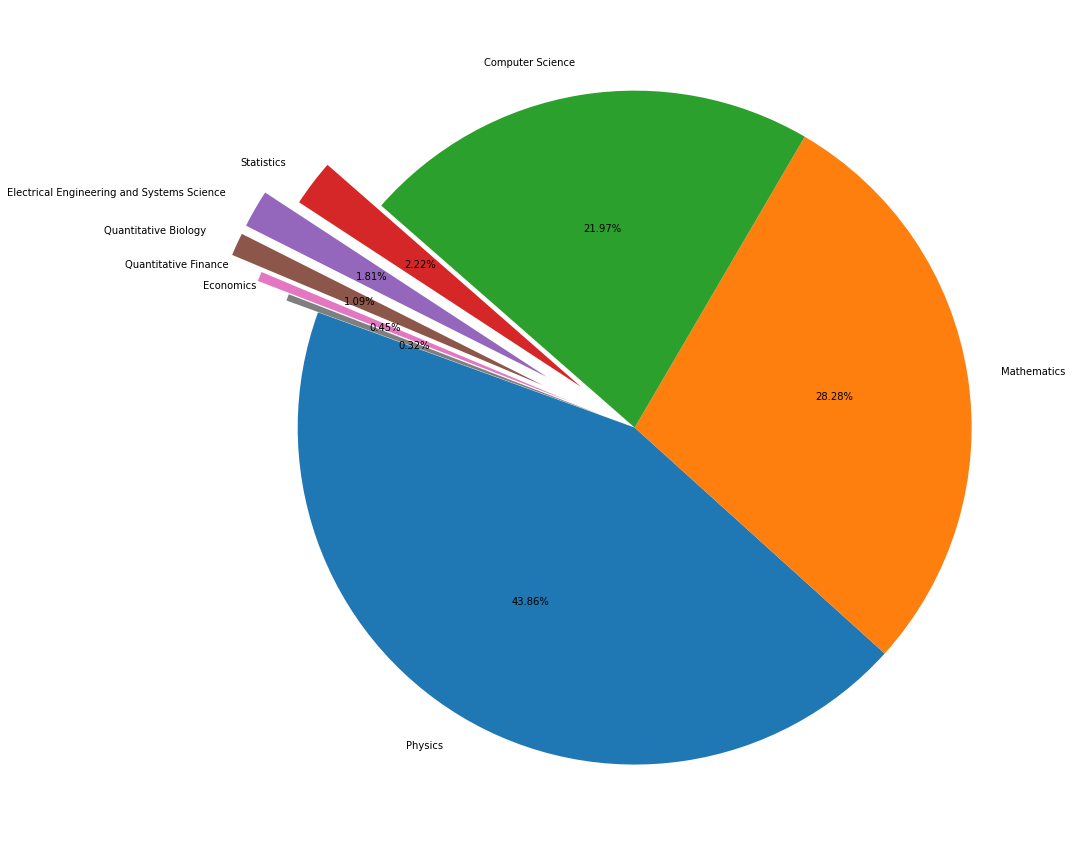

In [15]:
fig = plt.figure(figsize=(15,12))
explode = (0, 0, 0, 0.2, 0.3, 0.3, 0.2, 0.1) 
plt.pie(_df["id"],  labels=_df["group_name"], autopct='%1.2f%%', startangle=160, explode=explode)
plt.tight_layout()
plt.show()

In [16]:
group_name="Computer Science"
cats = data.merge(df_taxonomy, on="categories").query("group_name == @group_name")
cats.groupby(["year","category_name"]).count().reset_index().pivot(index="category_name", columns="year",values="id")

year                                             2019  2020
category_name                                              
Artificial Intelligence                           558   757
Computation and Language                         2153  2906
Computational Complexity                          131   188
Computational Engineering, Finance, and Science   108   205
Computational Geometry                            199   216
Computer Science and Game Theory                  281   323
Computer Vision and Pattern Recognition          5559  6517
Computers and Society                             346   564
Cryptography and Security                        1067  1238
Data Structures and Algorithms                    711   902
Databases                                         282   342
Digital Libraries                                 125   157
Discrete Mathematics                               84    81
Distributed, Parallel, and Cluster Computing      715   774
Emerging Technologies                             101    84
Formal Languages and Automata Theory              152   137
General Literature                                  5     5
Graphics                                          116   151
Hardware Architecture                              95   159
Human-Computer Interaction                        420   580
Information Retrieval                             245   331
Logic in Computer Science                         470   504
Machine Learning                                  177   538
Mathematical Software                              27    45
Multiagent Systems                                 85    90
Multimedia                                         76    66
Networking and Internet Architecture              864   783
Neural and Evolutionary Computing                 235   279
Numerical Analysis                                 40    11
Operating Systems                                  36    33
Other Computer Science                             67    69
Performance                                        45    51
Programming Languages                             268   294
Robotics                                          917  1298
Social and Information Networks                   202   325
Software Engineering                              659   804
Sound                                               7     4
Symbolic Computation                               44    36
Systems and Control                               415   133